<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Lab_Activities_WK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

In [23]:
#dbt = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/diabetes.csv')

In [24]:
penguins = sns.load_dataset("penguins")

In [25]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

PREPROCESSING

In [27]:
# Replace NAN with the mean

penguins = penguins.drop(columns=['island', 'sex'])
X = penguins.drop(columns='species')
y = penguins['species']
X = X.fillna(X.mean())

In [28]:
X.head()
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [29]:
# Split Data to training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=20231020
                                                    )


In [30]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((258, 4), (86, 4), (258,), (86,))

DECISION TREE MODELLING

In [31]:
# Instantiate and Fit
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

MODEL EVALUATION

In [32]:
a = balanced_accuracy_score(y_test, dt.predict(X_test))
b= balanced_accuracy_score(y_train, dt.predict(X_train))
eval = [b,a]
eval

[0.9263888888888889, 0.9137254901960784]

VISUALISATION

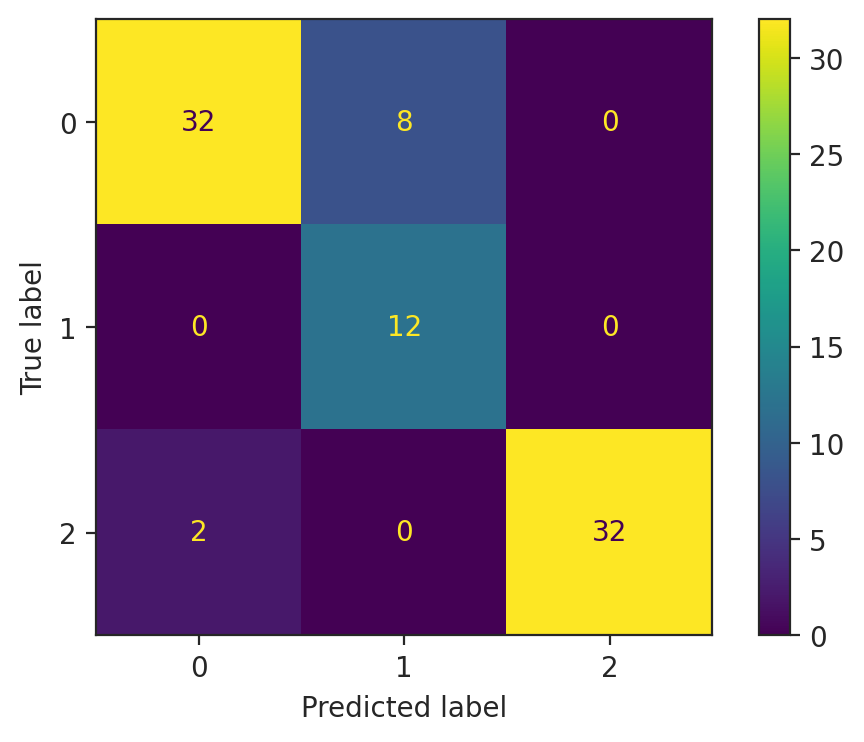

In [33]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, dt.predict(X_test))
).plot();

In [34]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [36]:
dtviz = dtreeviz.model(
    dt,
    X,
    y,
    target_name='species',
    feature_names=X.columns,
    class_names=['Adelie', "Chinstrap", "Gentoo"]
)
dtviz.view(scale=1.5, fontname='sans-serif')

TypeError: ignored